In [1]:
from clipppy import load_config
from matplotlib import pyplot as plt
import torch, pyro, numpy as np 
import collections
from ruamel.yaml import YAML


import sys
sys.path.append('/home/eliasd/lensing/elias_utils')
from plotting import *

In [2]:
config = load_config('config_fit_lens.yaml')
model = config.umodel


PARAMS = YAML().load(open('params.yaml'))['lens']

In [3]:
print(PARAMS['truth'])

ordereddict([('x', 0.3), ('y', 0.1), ('phi', 1.1), ('q', 0.5), ('index', 1.1), ('r_e', 0.9), ('I_e', 1.5)])


In [4]:
with pyro.poutine.trace() as tracer, pyro.condition(data=PARAMS['truth']):
    OBS = model()
OBSTRACE = tracer.trace

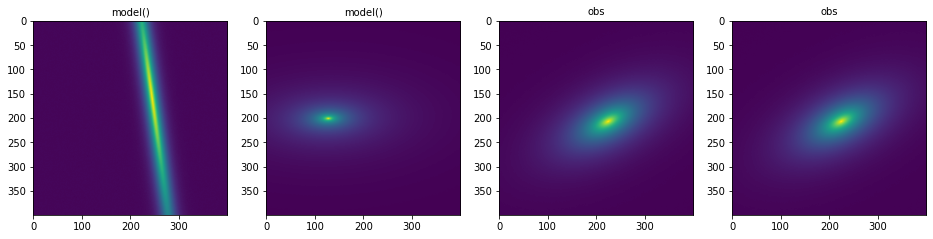

In [5]:
plot_imshow([model(), model(), OBS, OBS], size_y = 4, titles = ['model()', 'model()', 'obs', 'obs'])

In [6]:
keys = OBSTRACE.nodes.keys()
for k in keys: print(k, '\t', OBSTRACE.nodes[k]['fn'], '\t', OBSTRACE.nodes[k]['value'] )

x 	 Uniform(low: -1.0, high: 1.0) 	 0.3
y 	 Uniform(low: -1.0, high: 1.0) 	 0.1
phi 	 Uniform(low: 0.0, high: 3.141590118408203) 	 1.1
q 	 Uniform(low: 0.0, high: 1.0) 	 0.5
index 	 Uniform(low: 0.5, high: 2.0) 	 1.1
r_e 	 Uniform(low: 0.5, high: 2.0) 	 0.9
I_e 	 Uniform(low: 0.5, high: 2.0) 	 1.5
obs 	 Independent(Normal(loc: torch.Size([400, 400]), scale: torch.Size([400, 400])), 2) 	 tensor([[ 0.0038, -0.0115,  0.0142,  ...,  0.0505,  0.0490,  0.0504],
        [-0.0067, -0.0136,  0.0042,  ...,  0.0481,  0.0625,  0.0705],
        [ 0.0046,  0.0025, -0.0106,  ...,  0.0376,  0.0464,  0.0596],
        ...,
        [ 0.0592,  0.0499,  0.0607,  ...,  0.0219, -0.0102, -0.0025],
        [ 0.0450,  0.0585,  0.0364,  ...,  0.0018, -0.0066,  0.0011],
        [ 0.0523,  0.0462,  0.0698,  ...,  0.0111, -0.0020, -0.0047]])


In [7]:
torch.save(OBS, 'gen_source.pt')

# Testing lens parameters

In [8]:
from pyrofit.lensing.sources import SersicSource
from pyrofit.lensing.utils import get_meshgrid
sersic = SersicSource()
X, Y = get_meshgrid(0.0125, 400, 400)

- `x`     $x$-location of the galaxy centre
- `y`     $y$-location of the galaxy centre
- `phi`   rotation angle
- `q`     ellepticity (axes ratio)
- `index` $n$ from $b_n$
- `r_e`   $R_e$
-  `I_e`  $\beta_e$

$$
\beta^{\mathrm{Sérsic}}(\vec{x})=\beta_{e} \exp \left\{-b_{n}\left[\left(\frac{R(\vec{x})}{R_{e}}\right)^{1 / n}-1\right]\right\} \\
b_{n} \approx 2 n-\frac{1}{3}+\frac{4}{405} n^{-1}+\frac{46}{25515} n^{-2}+O\left(n^{-3}\right) \\
\left(\begin{array}{l}
R_{x} \\
R_{y}
\end{array}\right)=\left(\begin{array}{cc}
\sqrt{q} & 0 \\
0 & 1 / \sqrt{q}
\end{array}\right)\left(\begin{array}{cc}
\cos \phi & \sin \phi \\
-\sin \phi & \cos \phi
\end{array}\right)\left(\begin{array}{l}
x-x_{0} \\
y-y_{0}
\end{array}\right) \\
R(x, y)=\sqrt{R_{x}^{2}+R_{y}^{2}}, \quad \phi=\arctan \left(R_{y} / R_{x}\right)
$$

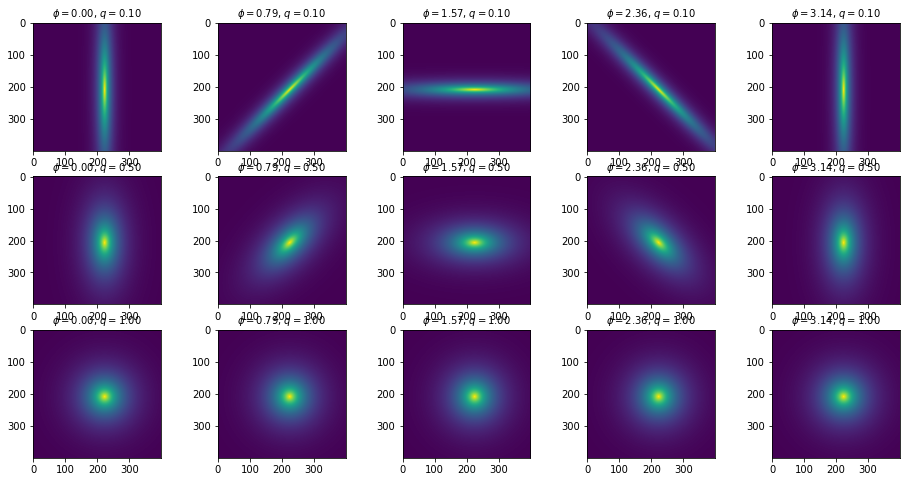

In [9]:
plots = []
titles = []
# vals = [0.0, 0.5, 1., 1.5, 2., 2.5, 3.0]
vals = [0.5, 1., 2.]

# for par2 in [0.1, 0.5, 1.]:
#     for par1 in [0., 1., 1.5, 2., 3.]:

for par2 in [0.1, 0.5, 1.]:
    for par1 in [np.pi * i / 4 for i in range(4+1)]:
    
    
        x = 0.3
        y = 0.1
        phi = par1
        q = par2
        index = 1.
        r_e = 1.
        I_e = 1.

        lens =  sersic(X,Y, x = x, y = y, phi = phi, q = q, index = index, r_e = r_e, I_e = I_e)

        plots.append(lens)
        titles.append(rf'$\phi = {par1:.2f}$, $q = {par2:.2f}$')
    
# titles = ["%.2f" % par for par in vals]
plot_imshow(plots, nrows = 3, titles = titles)#, colorbar = True)


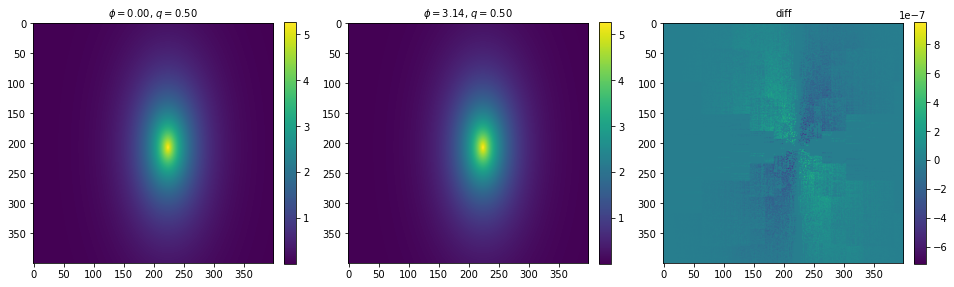

In [10]:
i, j = 5, 9
plot_imshow([plots[i], plots[j], plots[i] - plots[j]], titles = [titles[i], titles[j], 'diff'], colorbar = True)